In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


In [111]:
df=pd.read_csv('datset.csv')

In [112]:
df.head(5)

,Height,Weight
0,188,113
1,178,94
2,164,88
3,157,76
4,170,86


In [113]:
df.head()

,Height,Weight
0,188,113
1,178,94
2,164,88
3,157,76
4,170,86


In [114]:
df['Height'].isnull().sum()
df['Weight'].isnull().sum()

np.int64(0)

In [115]:
df.corr()

,Height,Weight
Height,1.000000,0.905068
Weight,0.905068,1.000000


Text(0, 0.5, 'Height(cm)')

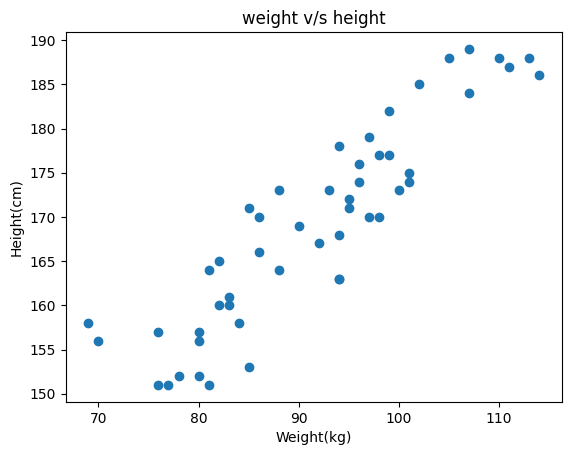

In [116]:
plt.scatter(df['Weight'],df['Height'])
plt.title('weight v/s height')
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')

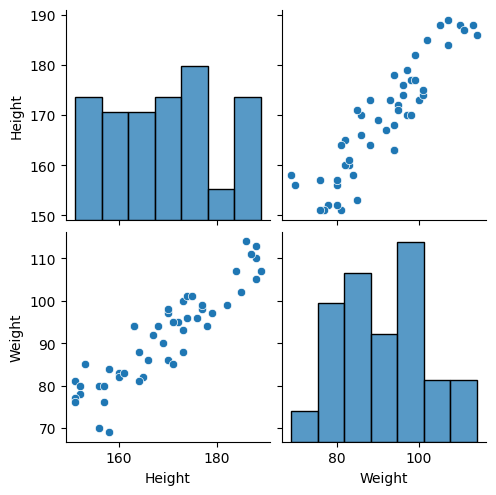

In [117]:
import seaborn as sns
sns.pairplot(df)

In [118]:
##deviding features into dependent and independent features
X=df[['Weight']]
y=df['Height']


In [119]:
np.array(X).shape

(50, 1)

In [120]:
np.array(y).shape

(50,)

In [121]:
##train test split
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25)

In [122]:
X_train.shape

(37, 1)

In [123]:
Y_train.shape

(37,)

In [124]:
X_test.shape

(13, 1)

In [125]:
Y_test.shape

(13,)

In [126]:
##standardization -->using z score covert big value to small value with mean =0 and std div=1
from sklearn.preprocessing import StandardScaler


In [127]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)

In [128]:
X_test=scalar.transform(X_test)

In [129]:
##apply linear regression
from sklearn.linear_model import LinearRegression


In [130]:
regression=LinearRegression()

In [131]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
slope=regression.coef_
intercept=regression.intercept_
print('slope of the train data is ',slope)
print('intercept of the train data is ',intercept)

slope of the train data is  [10.07430396]
intercept of the train data is  169.21621621621622


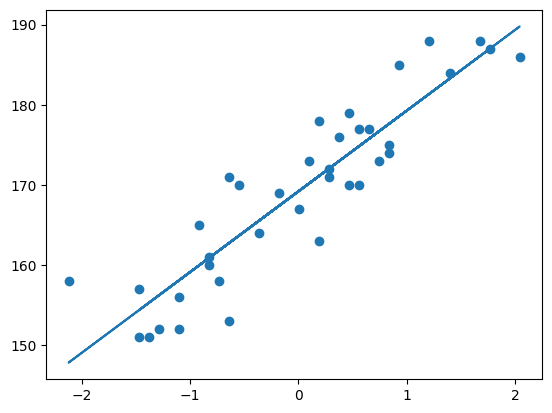

In [133]:
##plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

#   Prediction for test data

In [134]:
Y_pred=regression.predict(X_test)

In [135]:
##performnce metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [136]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

27.09137442618089
4.3171469480666556
5.204937504541326


In [139]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.7995779076333143


In [140]:
##display adjusted r2
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.781357717418161

In [142]:
##ols technique of linear regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()



In [147]:
prediction=model.predict(X_test)

In [148]:
print(prediction)

[ -9.23417495   1.93741545  14.03997172  -5.51031148 -10.16514081
 -10.16514081 -20.40576535   3.79934719  19.62576692   6.59224478
   1.93741545 -11.09610668  -3.64837975]


In [150]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.024
Method:                 Least Squares   F-statistic:                             0.1275
Date:                Fri, 22 Aug 2025   Prob (F-statistic):                       0.723
Time:                        22:40:02   Log-Likelihood:                         -242.37
No. Observations:                  37   AIC:                                      486.7
Df Residuals:                      36   BIC:                                      488.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [154]:
regression.predict(scalar.transform([[86]]))

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.70590474])